In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

/home/odyssey/.local/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
Matplotlib is building the font cache; this may take a moment.


In [3]:
data = pd.read_csv('data/ratings.csv')

In [4]:
data

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [5]:
def classification(rating: float):
    if rating <= 2:
        return 'низкий рейтинг'
    elif rating <= 4:
        return 'средний рейтинг'
    else:
        return 'высокий рейтинг'


In [6]:
data['class'] = data['rating'].apply(classification)
data

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,средний рейтинг
1,1,1029,3.0,1260759179,средний рейтинг
2,1,1061,3.0,1260759182,средний рейтинг
3,1,1129,2.0,1260759185,низкий рейтинг
4,1,1172,4.0,1260759205,средний рейтинг
...,...,...,...,...,...
99999,671,6268,2.5,1065579370,средний рейтинг
100000,671,6269,4.0,1065149201,средний рейтинг
100001,671,6365,4.0,1070940363,средний рейтинг
100002,671,6385,2.5,1070979663,средний рейтинг


In [7]:
data = pd.read_csv('data/keywords.csv')
data.head(5)

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [8]:
def region(data):
    flag = False
    geo_data = {
        'Центр': ['москва', 'тула', 'ярославль'],
        'Северо-Запад': ['петербург', 'псков', 'мурманск'],
        'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
    }
    for i in geo_data:
        for j in geo_data[i]:
            if j in data:
                flag = True
            if flag:
                return i
    return 'undefined'

In [9]:
data['region'] = data['keyword'].apply(region)
data.loc[data['region'] == 'Центр']

,keyword,shows,region
127,авито москва,979292,Центр
849,авито ярославль,209581,Центр
1259,москва,153050,Центр
1396,гисметео москва,140279,Центр
1482,госуслуги москва,133061,Центр
...,...,...,...
98943,вакансии на авито москва от прямых работодателей,3738,Центр
99292,афиша кино москва на сегодня,3704,Центр
99590,авито ярославль автомобили с пробегом,3673,Центр
99890,яндекс метро москва,4548,Центр


In [10]:
ratings = pd.read_csv('data/ratings.csv')
movies = pd.read_csv('data/movies.csv')

In [11]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [75]:
def year(data):
    try:
        return int(re.findall(r'\d{4}', data)[-1])
    except IndexError:
        return float('NaN')
movies['year'] = movies['title'].apply(year)
data = ratings.set_index('movieId').join(movies.set_index('movieId'))

In [76]:
years_ratings = data.groupby('year')['rating'].mean()

<AxesSubplot:xlabel='year'>

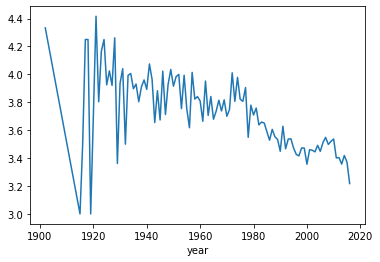

In [77]:
years_ratings.plot()

In [78]:
years_ratings = years_ratings.reset_index()

In [79]:
years_ratings

,year,rating
0,1902.0,4.333333
1,1915.0,3.000000
2,1916.0,3.500000
3,1917.0,4.250000
4,1918.0,4.250000
...,...,...
98,2012.0,3.404153
99,2013.0,3.356973
100,2014.0,3.418546
101,2015.0,3.371028


In [85]:
years_ratings[(years_ratings['year'] >= 1950)&(years_ratings['year'] <= 2010)].sort_values('rating')

,year,rating
86,2000.0,3.355945
83,1997.0,3.415764
82,1996.0,3.426600
89,2003.0,3.444777
91,2005.0,3.448434
...,...,...
37,1951.0,3.983539
40,1954.0,3.994220
38,1952.0,4.000000
58,1972.0,4.011136
